# Keras Training : Convolutional Nueral Network (CNN) on MNIST dataset _ using functional API

## Import Libraries

In [34]:
import keras
from keras.utils import to_categorical

# Can plot model and save it.
from keras.utils import plot_model
from keras.datasets import mnist

# keras.model have two main types of models: Sequential and the Model class using functional API
# we will focus on the functional API model in this notebook
from keras.models import Model

# Input: input layer for functional API
# Dense: fully connected layer
# Activation: activation function such as relu,sigmoid,softmax...(look up Keras docs for more)
# Conv2D: cnn layer for 2D image data
# MaxPooling2D: max pooling layer for 2D image
from keras.layers import Input, Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

# Many optimizers can be chosen: Adagrad, RMSprop, SGD...(look up Keras docs for more)
from keras.optimizers import Adagrad, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

# In order to save and load model
import h5py
from keras.models import load_model

## Useful parameters

In [35]:
# 10 classes
num_class = 10

# Image size: 28*28 
image_width = image_height = 28

# Training batch size, default is 32
batch = 64

# Training epochs
epoch = 10

## Load MNIST dataset (Also preprocessing it!)

In [36]:
# No flatten data! Feed CNN data should be original image shape

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,image_width,image_height,1)
x_train = x_train.astype('float32')
x_train /= 255.0

x_test = x_test.reshape(-1,image_width,image_height,1)
x_test = x_test.astype('float32')
x_test /= 255.0

y_train_onehot = to_categorical(y_train, num_classes = num_class)
y_test_onehot = to_categorical(y_test, num_classes = num_class)

## Define useful methods

In [37]:
def draw_image(images, y_label, y_pred = None):
    
    assert(len(images) == len(y_label) == 9)
    
    fig, axes = plt.subplots(3,3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28,28), cmap = 'binary')
        
        if y_pred is None:
            ax.set_xlabel("True: "+str(y_label[i]))
        else:
            ax.set_xlabel("True: "+str(y_label[i])+"  Pred: "+str(y_pred[i]))
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

In [38]:
def draw_prob(images, y_label, y_prob):
    
    assert(len(images) == len(y_label) == 9)
    labels = [0,1,2,3,4,5,6,7,8,9]
    
    fig, axes = plt.subplots(9,2,figsize=(10, 20))
    fig.subplots_adjust(hspace=1.0, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        if i%2 == 0:
            ax.imshow(images[int(i/2)].reshape(28,28), cmap = 'binary')
            ax.set_xlabel("True: "+str(y_label[int(i/2)]))
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            index = int((i-1)/2)
            y_pos = np.arange(5)  # Show five top probabilities
            ans = y_label[index]  # The answer of the current image
            probs = y_prob[index]  # List of probabilities
            prob_result = zip(labels,probs) # (label,prob) list
            prob_result_sorted = sorted(prob_result, key = lambda tup: tup[1], reverse=True)
            prob_result_sorted = list(zip(*prob_result_sorted))
            
            bars = ax.barh(y_pos,(prob_result_sorted[1][:5]),color='green')
            ax.set_yticks(y_pos)
            ax.set_yticklabels(prob_result_sorted[0][:5])
            ax.set_xlabel("Probability")

In [49]:
# Define convolutional model here
def cnn_model(image_width, num_class):
    # Input is the shape of one image
    inputs = Input(shape = (image_width,image_width,1))
    conv1 = Conv2D(filters = 32, kernel_size = 5, strides = (2,2), activation = 'relu', name = 'Conv1', data_format = 'channels_last')(inputs)
    pool1 = MaxPooling2D(pool_size=(2,2), name = 'Pool1')(conv1)
    conv2 = Conv2D(filters = 16, kernel_size = 3, strides = (1,1), activation = 'relu', name = 'Conv2', data_format = 'channels_last')(pool1)
    pool2 = MaxPooling2D(pool_size=(2,2), name = 'Pool2')(conv2)
    flat = Flatten(name = 'Flat')(pool2)
    outputs = Dense(num_class, activation = 'softmax', name = 'Output')(flat)
    
    model = Model(inputs = inputs, outputs = outputs)
    model.compile(
        optimizer = RMSprop(lr = 0.001),
        loss = 'categorical_crossentropy',
        metrics = ['acc']
    )
    return model

## Construct CNN model

### Build model

In [50]:
model = cnn_model(image_width, num_class)

### Show model info

In [51]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 12, 12, 32)        832       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 6, 6, 32)          0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 4, 4, 16)          4624      
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 2, 2, 16)          0         
_________________________________________________________________
Flat (Flatten)               (None, 64)                0         
_________________________________________________________________
Output (Dense)               (None, 10)                650       
Total para

In [52]:
# plot model graph
plot_model(model, to_file='mnist_cnn_v1_graph.png')

## Train model

In [53]:
model.fit(
    x = x_train,
    y = y_train_onehot,
    batch_size = batch,
    epochs = epoch,
    validation_split = 0.3,
    verbose = 1,
    shuffle = True
)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 173us/step - loss: 0.5306 - acc: 0.8461 - val_loss: 0.2353 - val_acc: 0.9271
Epoch 2/10
42000/42000 [==============================] - 7s 166us/step - loss: 0.1687 - acc: 0.9495 - val_loss: 0.1728 - val_acc: 0.9463
Epoch 3/10
42000/42000 [==============================] - 7s 166us/step - loss: 0.1239 - acc: 0.9619 - val_loss: 0.1167 - val_acc: 0.9649
Epoch 4/10
42000/42000 [==============================] - 7s 167us/step - loss: 0.1001 - acc: 0.9686 - val_loss: 0.0991 - val_acc: 0.9699
Epoch 5/10
42000/42000 [==============================] - 7s 167us/step - loss: 0.0844 - acc: 0.9730 - val_loss: 0.1098 - val_acc: 0.9661
Epoch 6/10
42000/42000 [==============================] - 7s 169us/step - loss: 0.0743 - acc: 0.9772 - val_loss: 0.0875 - val_acc: 0.9725
Epoch 7/10
42000/42000 [==============================] - 7s 167us/step - loss: 0.0666 - acc: 0.9789 - val_loss: 0.0770 - 

## Evaluate model

In [54]:
result = model.evaluate(
    x=x_test,
    y=y_test_onehot,
    batch_size=batch,
    verbose=1,
)

10000/10000 [==============================] - 1s 61us/step


In [55]:
print("Test loss: "+str(result[0]))
print("Test accuracy: "+str(result[1]))

Test loss: 0.04969900945005938
Test accuracy: 0.9836


In [56]:
# Returns a np array with probabilities for each class
predictions = model.predict(
    x = x_test
)

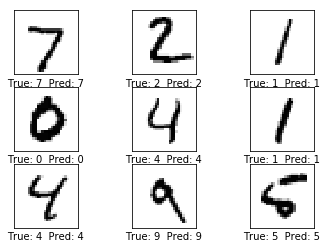

In [57]:
y_pred = np.argmax(predictions,axis=1)

# Show first nine image predictions for testing data
draw_image(x_test[:9],y_test[:9],y_pred[:9])

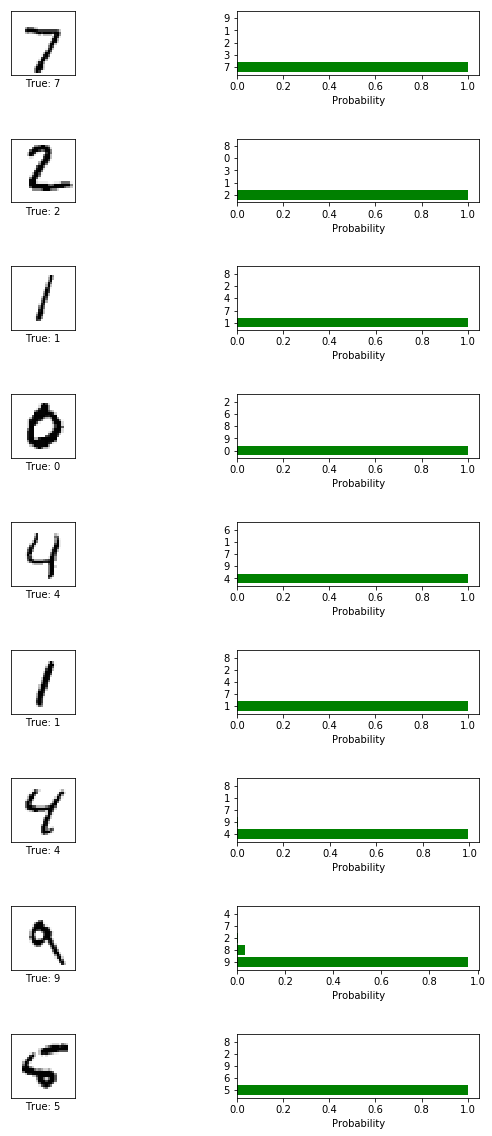

In [58]:
draw_prob(x_test[:9],y_test[:9],predictions[:9])